# EDA Process

In this notebook we are going to do the exploratory data analysis of the csv that were loaded from the API in the former notebook

## Import the libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set()

## Now the files

In [20]:
a_df_access_broadband_narrowband = pd.read_csv("Datasets/access_broadband_narrowband.csv")
b_df_access_fixed_internet_by_dowload_local = pd.read_csv("Datasets/access_fixed_internet_by_dowload_local.csv")
c_df_access_fixed_internet_by_tecnology_local = pd.read_csv("Datasets/access_fixed_internet_by_tecnology_local.csv")
d_df_access_fixed_internet_byprovince = pd.read_csv("Datasets/access_fixed_internet_byprovince.csv")
e_df_dowload_speed_byprovince = pd.read_csv("Datasets/dowload_speed_byprovince.csv")
f_df_fixed_internet_by_tech = pd.read_csv("Datasets/fixed_internet_by_tech.csv")
g_df_internet_access_byspeed_download1 = pd.read_csv("Datasets/internet_access_byspeed_download1.csv")
h_df_internet_access_byspeed_download2 = pd.read_csv("Datasets/internet_access_byspeed_download2.csv")
i_df_internet_penetration = pd.read_csv("Datasets/internet_penetration.csv")
j_df_localities_internet_access = pd.read_csv("Datasets/localities_internet_access.csv")
k_df_median_download_fixed_internet = pd.read_csv("Datasets/median_download_fixed_internet.csv")
m_df_national_access_by_fixed_internet = pd.read_csv("Datasets/national_access_by_fixed_internet.csv")
n_df_national_internet_access = pd.read_csv("Datasets/national_internet_access.csv")
o_df_penetration_by_national_home = pd.read_csv("Datasets/penetration_by_national_home.csv")
p_df_profits_trimestrer_fixed_internet = pd.read_csv("Datasets/profits_trimestrer_fixed_internet.csv")

## Now we look at the dataframes, one by one

In [21]:
a_df_access_broadband_narrowband.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


In [5]:
a_df_access_broadband_narrowband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


We see that this df has no nulls

In [9]:
a_df_access_broadband_narrowband.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,862.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.595128,137.636574
std,2.583484,1.118682,180.812265,230.167337,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,16.000000,91.000000
75%,2020.000000,3.250000,143.000000,253.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


For Banda ancha and Dial up and Banda ancha fija columns the mean and the median are not the same, so there are outliers to search or the data is very disperse. We will use a scatter to look that

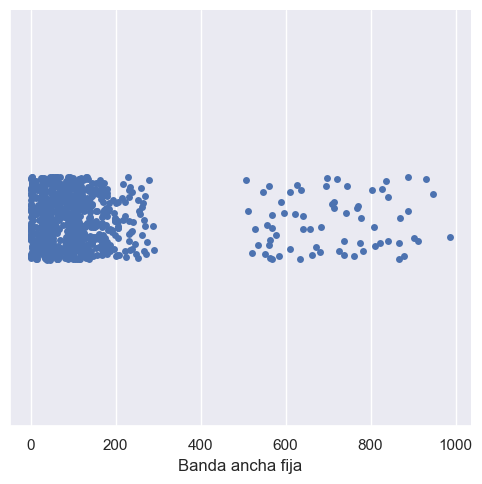

In [15]:
sns.catplot(data=a_df_access_broadband_narrowband, x = "Banda ancha fija")

Most of the values are under 400. We will see the values over that values

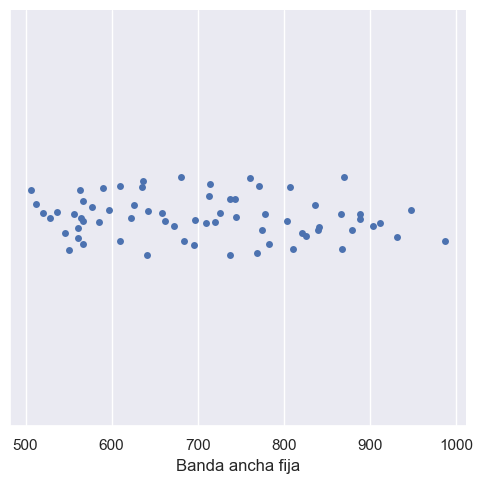

In [23]:
over = a_df_access_broadband_narrowband["Banda ancha fija"] > 400
over = a_df_access_broadband_narrowband[over]
sns.catplot(data=over, x = "Banda ancha fija")

The data is dispersed but no particular trend is seen

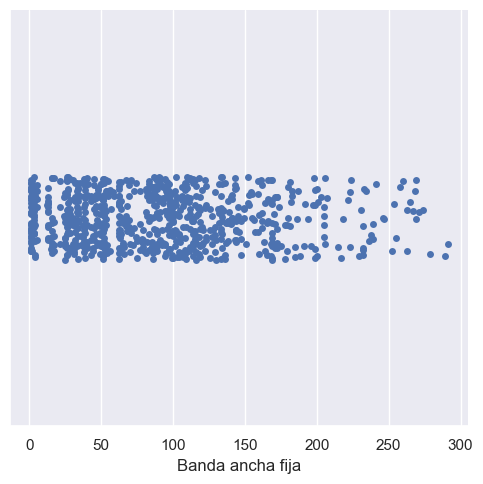

In [24]:
under = a_df_access_broadband_narrowband["Banda ancha fija"] < 400
under = a_df_access_broadband_narrowband[under]
sns.catplot(data=under, x = "Banda ancha fija")

Here you can see that most values between, under 400, are under 150 too, so majority of the number of access by trimestrer and province are under that value.

Let's see what is happening with Dial Up

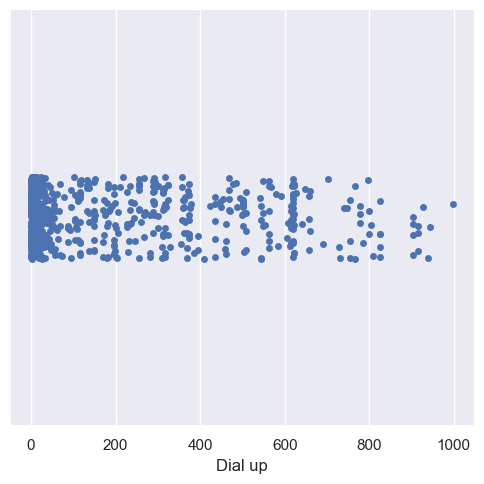

In [26]:
sns.catplot(data=a_df_access_broadband_narrowband, x = "Dial up")

You see a lot of values are under 200

In [27]:
# continue with the rest of the analysis of the dial up column

Now, would be interesting too see correlations between 